## Loading of Libraries
### Load all the libraries to be used

In [ ]:
import pandas as pd 
import numbers as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

from sklearn.model_selection import train_test_split

## Loading of Datasets

In [2]:
df=pd.read_csv('Dataset//hospital_readmissions.csv')

df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


## Data exploration 


In [3]:
df.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [5]:
df.isnull().sum()

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

In [6]:
df['age'].value_counts()

age
[70-80)     6837
[60-70)     5913
[80-90)     4516
[50-60)     4452
[40-50)     2532
[90-100)     750
Name: count, dtype: int64

In [7]:
df['medical_specialty'].value_counts()

medical_specialty
Missing                   12382
InternalMedicine           3565
Other                      2664
Emergency/Trauma           1885
Family/GeneralPractice     1882
Cardiology                 1409
Surgery                    1213
Name: count, dtype: int64

In [8]:

print(df['diag_1'].value_counts())


diag_1
Circulatory        7824
Other              6498
Respiratory        3680
Digestive          2329
Diabetes           1747
Injury             1666
Musculoskeletal    1252
Missing               4
Name: count, dtype: int64


In [9]:
print(df['diag_2'].value_counts())


diag_2
Other              9056
Circulatory        8134
Diabetes           2906
Respiratory        2872
Digestive           973
Injury              591
Musculoskeletal     426
Missing              42
Name: count, dtype: int64


In [10]:
print(df['diag_3'].value_counts())

diag_3
Other              9107
Circulatory        7686
Diabetes           4261
Respiratory        1915
Digestive           916
Injury              464
Musculoskeletal     455
Missing             196
Name: count, dtype: int64


In [11]:
print("The duplicated dataset is",df.duplicated().sum())

The duplicated dataset is 0


In [12]:
print("The shape of the dataset is:", df.shape)
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])


The shape of the dataset is: (25000, 17)
Number of rows: 25000
Number of columns: 17


# Data Preprocessing


In [13]:
numerical_columns = df.select_dtypes(include=['number']).columns
print("Numerical Columns:", numerical_columns)

categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_columns)


Numerical Columns: Index(['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications',
       'n_outpatient', 'n_inpatient', 'n_emergency'],
      dtype='object')
Categorical Columns: Index(['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3',
       'glucose_test', 'A1Ctest', 'change', 'diabetes_med', 'readmitted'],
      dtype='object')


In [14]:
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if any(df[col] < lower_bound) or any(df[col] > upper_bound):
        print(f'Outliers detected in {col}')
    else:
        print(f'No outliers in {col}')


Outliers detected in time_in_hospital
Outliers detected in n_lab_procedures
Outliers detected in n_procedures
Outliers detected in n_medications
Outliers detected in n_outpatient
Outliers detected in n_inpatient
Outliers detected in n_emergency


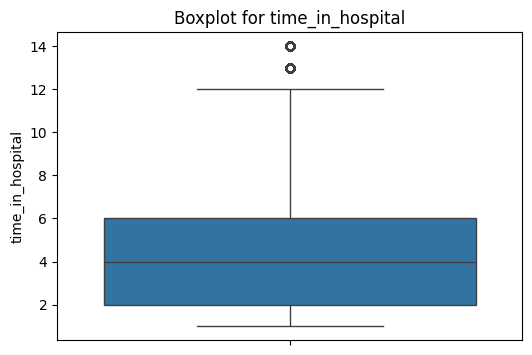

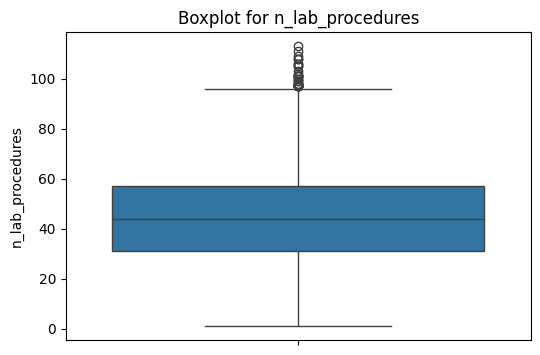

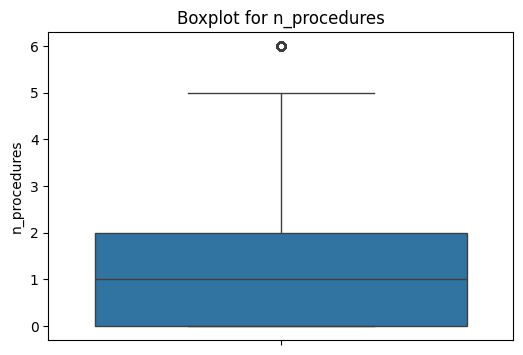

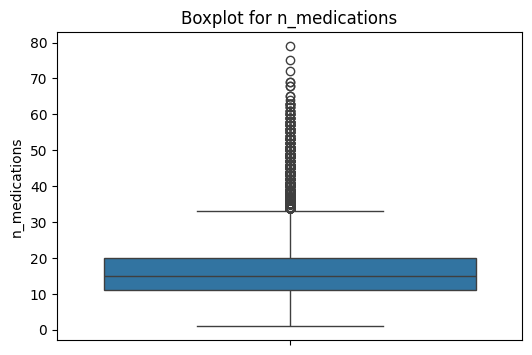

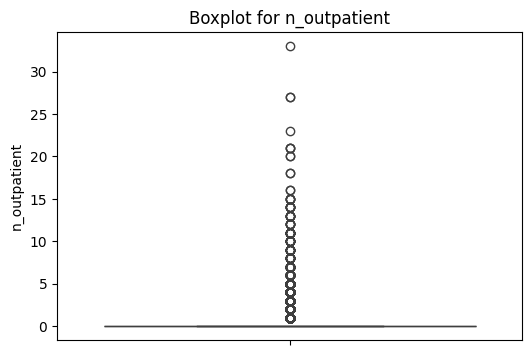

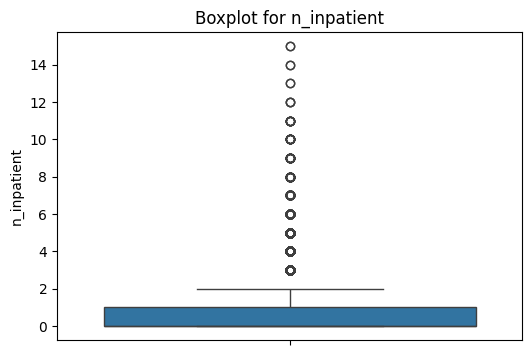

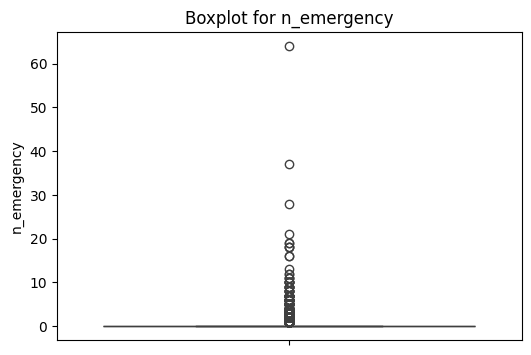

In [15]:

for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


In [16]:
import numpy as np
# Loop through each column
for col in numerical_columns:
    # Calculate the IQR for the column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the outliers at the upper and lower bounds
    df[col] = np.where(
        df[col] > upper_bound, upper_bound,
        np.where(df[col] < lower_bound, lower_bound, df[col])
    )


In [17]:
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if any(df[col] < lower_bound) or any(df[col] > upper_bound):
        print(f'Outliers detected in {col}')
    else:
        print(f'No outliers in {col}')


No outliers in time_in_hospital
No outliers in n_lab_procedures
No outliers in n_procedures
No outliers in n_medications
No outliers in n_outpatient
No outliers in n_inpatient
No outliers in n_emergency


In [18]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
le = LabelEncoder()

for col in categorical_columns:
    df[col] = le.fit_transform(df[col].astype(str))


In [19]:
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,3,8.0,72.0,1.0,18.0,0.0,0.0,0.0,4,0,7,6,1,1,0,1,0
1,3,3.0,34.0,2.0,13.0,0.0,0.0,0.0,5,6,6,6,1,1,0,1,0
2,1,5.0,45.0,0.0,18.0,0.0,0.0,0.0,4,0,0,0,1,1,1,1,1
3,3,2.0,36.0,0.0,12.0,0.0,0.0,0.0,4,0,6,1,1,1,1,1,1
4,2,1.0,42.0,0.0,7.0,0.0,0.0,0.0,3,6,0,7,1,1,0,1,0


# Feature Engineering

In [20]:
df['total_procedure'] = df['n_procedures'] + df['n_lab_procedures']

print(df[['n_procedures', 'n_lab_procedures', 'total_procedure']].head())


   n_procedures  n_lab_procedures  total_procedure
0           1.0              72.0             73.0
1           2.0              34.0             36.0
2           0.0              45.0             45.0
3           0.0              36.0             36.0
4           0.0              42.0             42.0


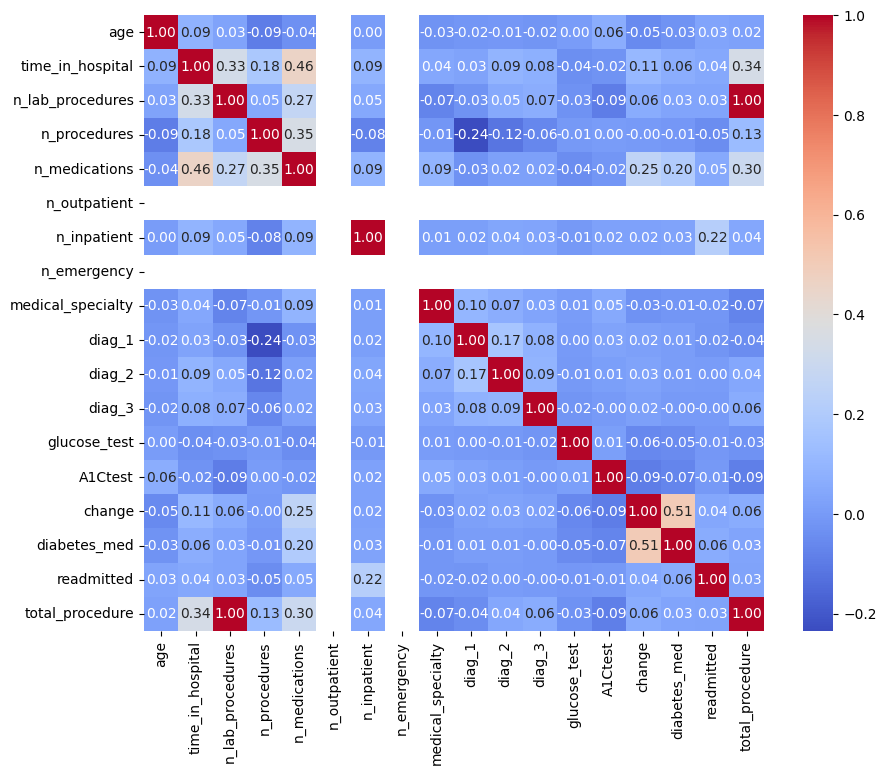

In [21]:

corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [22]:
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted,total_procedure
0,3,8.0,72.0,1.0,18.0,0.0,0.0,0.0,4,0,7,6,1,1,0,1,0,73.0
1,3,3.0,34.0,2.0,13.0,0.0,0.0,0.0,5,6,6,6,1,1,0,1,0,36.0
2,1,5.0,45.0,0.0,18.0,0.0,0.0,0.0,4,0,0,0,1,1,1,1,1,45.0
3,3,2.0,36.0,0.0,12.0,0.0,0.0,0.0,4,0,6,1,1,1,1,1,1,36.0
4,2,1.0,42.0,0.0,7.0,0.0,0.0,0.0,3,6,0,7,1,1,0,1,0,42.0


C:\Users\hanfy\AppData\Local\Temp\ipykernel_16544\2675487917.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='Set2')


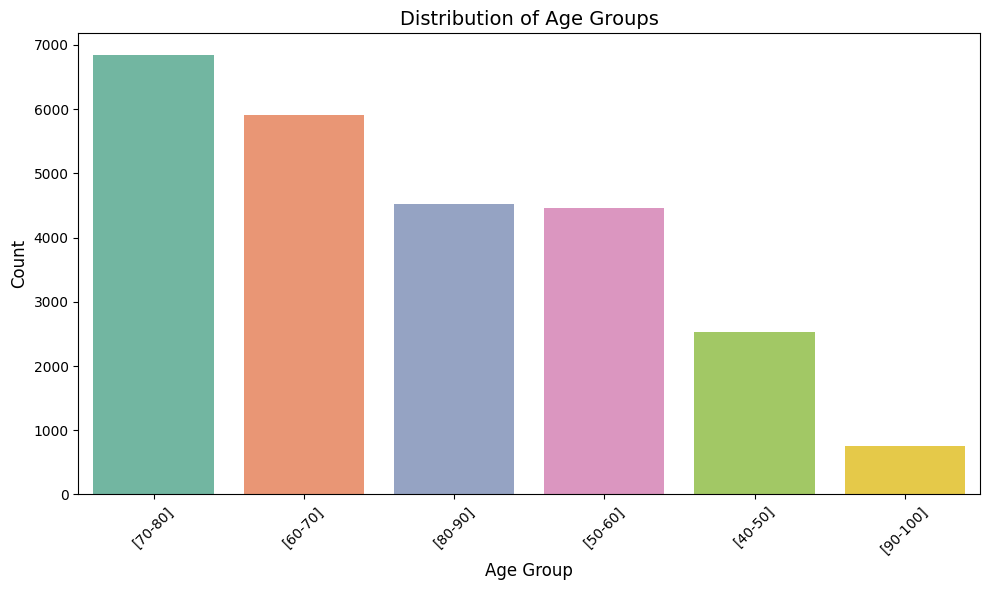

In [23]:
# Replace numeric values with specified age groups
age_group_mapping = {
    0: '[40-50]',
    1: '[50-60]',
    2: '[60-70]',
    3: '[70-80]',
    4: '[80-90]',
    5: '[90-100]'
}

# Apply the mapping to the 'age_group' column
df['age'] = df['age'].replace(age_group_mapping)

# Count the occurrences of each age group
age_group_counts = df['age'].value_counts()

# Create a bar plot to show the distribution of age groups
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='Set2')

# Add labels and title
plt.title('Distribution of Age Groups', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


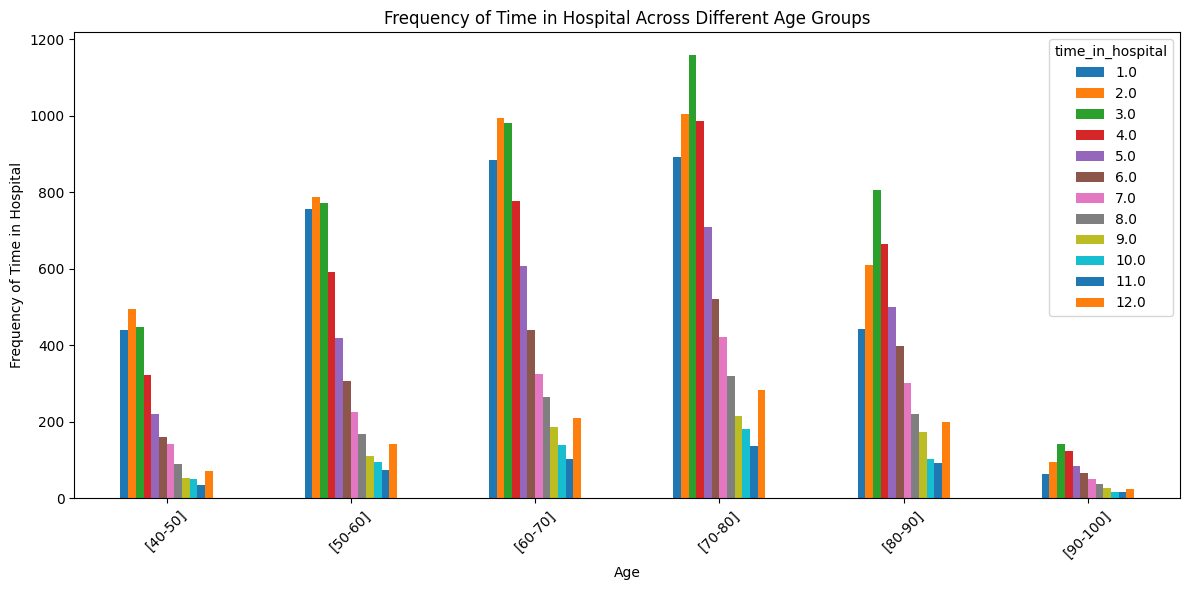

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Group the data by 'age' and 'time_in_hospital'
age_time_counts = df.groupby('age')['time_in_hospital'].value_counts().unstack(fill_value=0)

# Plot the bar chart
age_time_counts.plot(kind='bar', figsize=(12, 6), stacked=False)

# Customize the plot
plt.xlabel('Age')
plt.ylabel('Frequency of Time in Hospital')
plt.title('Frequency of Time in Hospital Across Different Age Groups')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\hanfy\AppData\Local\Temp\ipykernel_16544\2227579296.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age', y='total_procedure', data=age_procedure_totals, palette='Set2')


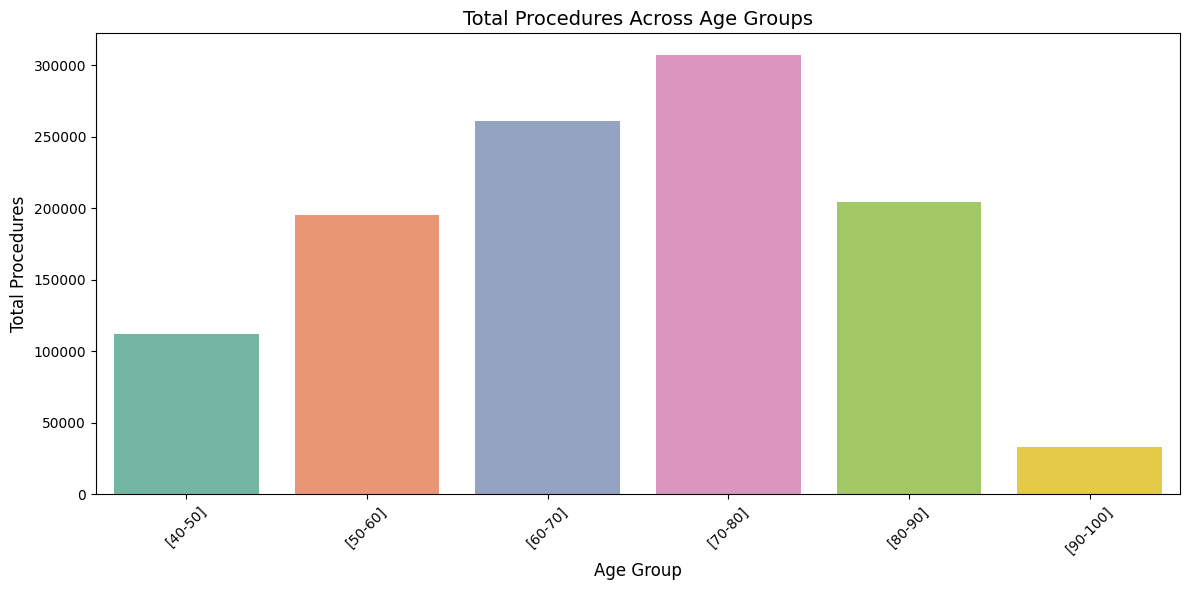

In [25]:


# Group by 'age' and calculate the total procedure count
age_procedure_totals = df.groupby('age')['total_procedure'].sum().reset_index()

# Create a bar plot to show the total procedures for each age group
plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='total_procedure', data=age_procedure_totals, palette='Set2')

# Add labels and title
plt.title('Total Procedures Across Age Groups', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Procedures', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\hanfy\AppData\Local\Temp\ipykernel_16544\791692338.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='medical_specialty', y='num_patients', data=specialty_patient_count, palette='Set2')


The number of patients per medical specialty is:           medical_specialty  num_patients
0                   Missing         12382
1          InternalMedicine          3565
2                     Other          2664
3  Family/GeneralPractice            1885
4          Emergency/Trauma          1882
5                Cardiology          1409
6                   Surgery          1213


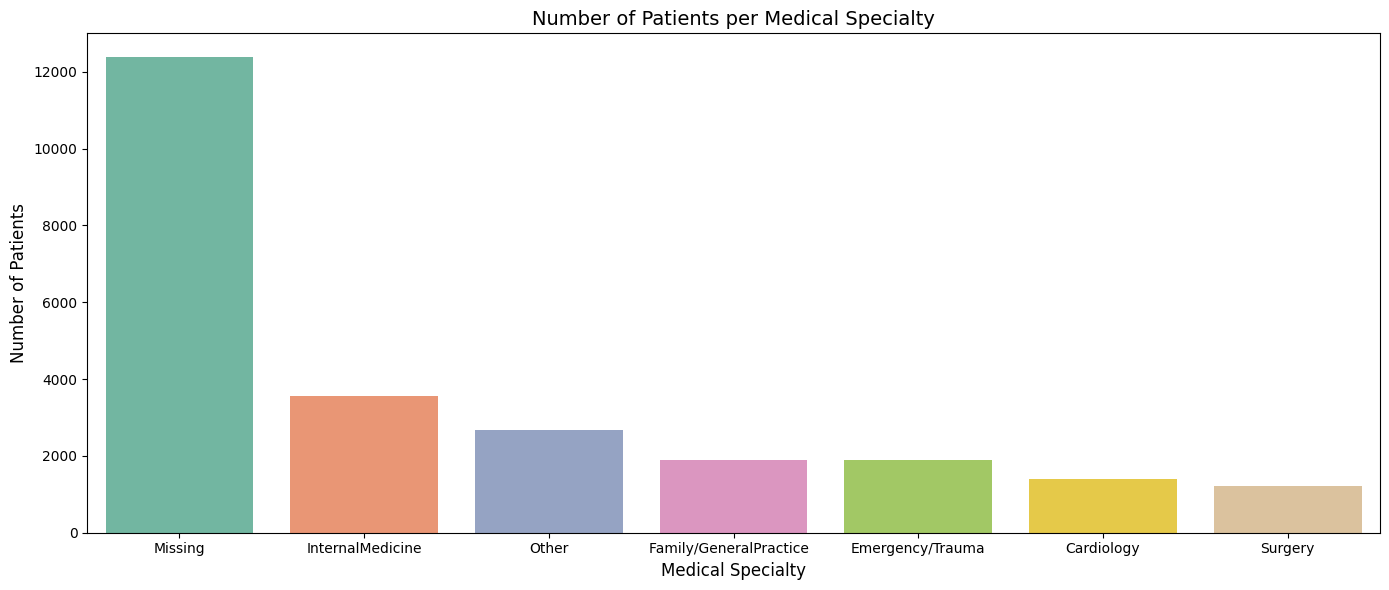

In [26]:

medical_specialty_group_mapping = {
    0: 'Cardiology',
    1: 'Family/GeneralPractice  ',
    2: 'Emergency/Trauma',
    3: 'InternalMedicine',
    4: 'Missing',
    5: 'Other',
    6: 'Surgery'
}

# Apply the mapping to the 'age_group' column
df['medical_specialty'] = df['medical_specialty'].replace(medical_specialty_group_mapping)
# Group by 'medical_specialty' and count the number of patients in each specialty
specialty_patient_count = df['medical_specialty'].value_counts().reset_index()
specialty_patient_count.columns = ['medical_specialty', 'num_patients']

# Create a bar plot to show the number of patients per medical specialty
plt.figure(figsize=(14, 6))
sns.barplot(x='medical_specialty', y='num_patients', data=specialty_patient_count, palette='Set2')

# Add labels and title
plt.title('Number of Patients per Medical Specialty', fontsize=14)
plt.xlabel('Medical Specialty', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)



print("The number of patients per medical specialty is:",specialty_patient_count)
# Show the plot
plt.tight_layout()
plt.show()



In [27]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
le = LabelEncoder()

for col in categorical_columns:
    df[col] = le.fit_transform(df[col].astype(str))


In [28]:
X = df.drop('readmitted', axis=1)  
y = df['readmitted']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(256, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),

    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Use softmax for multi-class classification
])

model.compile(loss='binary_crossentropy',  # Use 'categorical_crossentropy' for multi-class classification
              optimizer=Adam(),
              metrics=['accuracy'])

c:\Users\hanfy\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5245 - loss: 0.7392 - val_accuracy: 0.5766 - val_loss: 0.6783
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5826 - loss: 0.6783 - val_accuracy: 0.5812 - val_loss: 0.6787
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6014 - loss: 0.6692 - val_accuracy: 0.5988 - val_loss: 0.6647
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6003 - loss: 0.6662 - val_accuracy: 0.6108 - val_loss: 0.6610
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6040 - loss: 0.6643 - val_accuracy: 0.5990 - val_loss: 0.6684
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6010 - loss: 0.6670 - val_accuracy: 0.6030 - val_loss: 0.6639
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5947 - loss: 0.6667 - val_accuracy: 0.6084 - val_loss: 0.6586
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6031 - loss: 0.6647 - val_accuracy: 0.

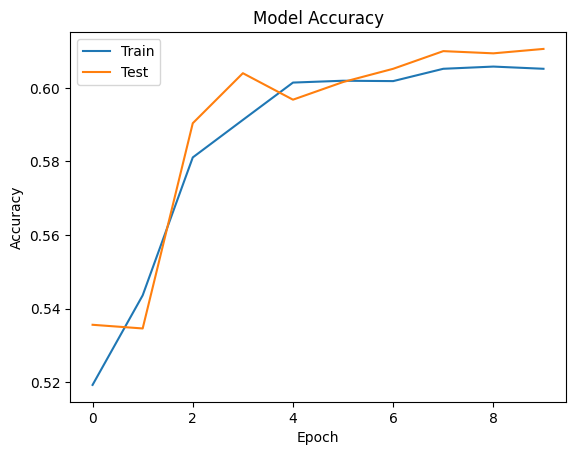

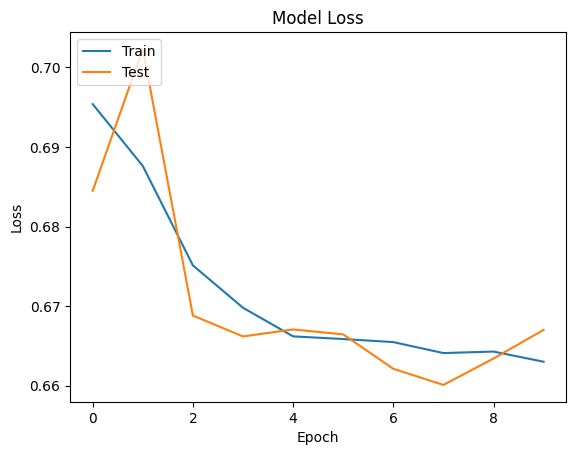

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()